In [8]:
import yfinance as yf 
import pandas as pd 
import numpy as np 
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

In [9]:
end_date = datetime.today().strftime('%Y-%m-%d')
spy = yf.download('SPY', start='1993-01-29', end=end_date)

[*********************100%***********************]  1 of 1 completed


In [10]:
spy = spy.drop(columns=["Open", "High", "Low", "Close", "Volume"])
spy.reset_index(inplace=True)
spy = spy.rename(columns={"Adj Close": "close_price", "Date": "date"})
spy["date"] = pd.to_datetime(spy["date"])
spy["close_price"] = spy["close_price"].round(2)

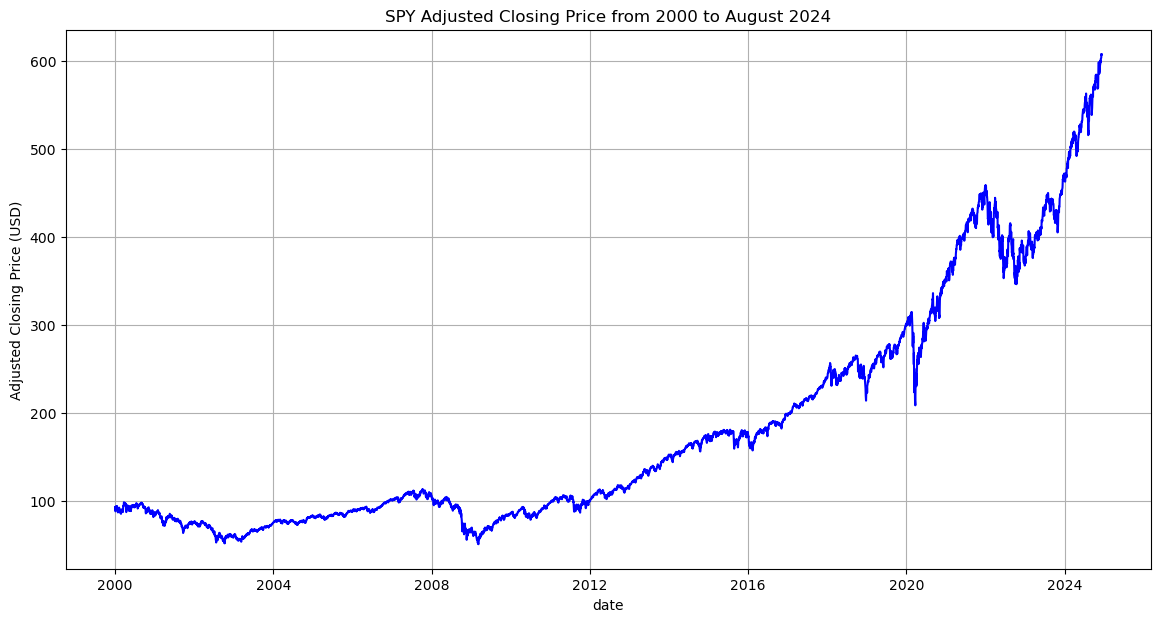

In [76]:
"""
Plot the adjusted closing price of SPY
"""
plt.figure(figsize=(14, 7))
plt.plot(spy['date'], spy['close_price'], color='blue')
plt.title('SPY Adjusted Closing Price from 2000 to August 2024')
plt.xlabel('date')
plt.ylabel('Adjusted Closing Price (USD)')
plt.grid(True)
plt.savefig('spy_trend.png')
plt.show()

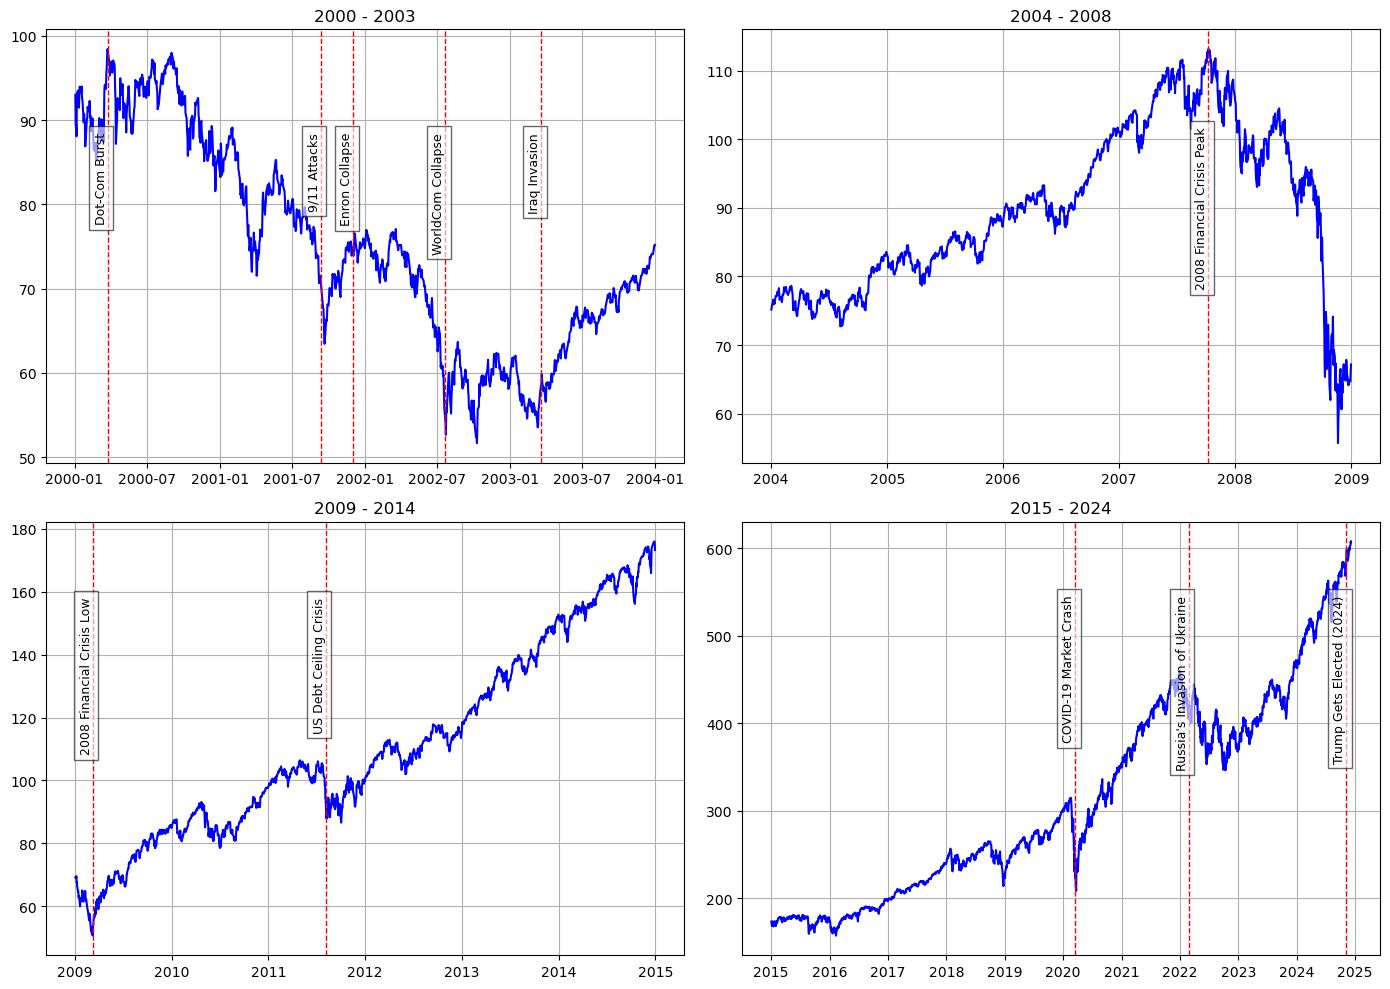

In [12]:
events = {
    'Dot-Com Burst': '2000-03-24',
    '9/11 Attacks': '2001-09-11',
    'Enron Collapse': '2001-12-02',
    'WorldCom Collapse': '2002-07-21',
    'Iraq Invasion': '2003-03-20',
    '2008 Financial Crisis Peak': '2007-10-09',
    '2008 Financial Crisis Low': '2009-03-09',
    'US Debt Ceiling Crisis': '2011-08-05',
    'COVID-19 Market Crash': '2020-03-16',
    'Russia\'s Invasion of Ukraine': '2022-02-24',
    'Trump Gets Elected (2024)': '2024-11-05'  # Added event
}

# Convert event dates to datetime
events = {k: pd.to_datetime(v) for k, v in events.items()}

# Define date ranges
date_ranges = [
    ('2000-01-01', '2003-12-31'),
    ('2004-01-01', '2008-12-31'),
    ('2009-01-01', '2014-12-31'),
    ('2015-01-01', '2024-12-31')  # Extended to include the new event
]

# Create the figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))
axes = axs.flatten()

# Function to plot data in each subplot
def plot_subplot(ax, start_date, end_date):
    # Filter the data for the specific date range
    data = spy[(spy['date'] >= start_date) & (spy['date'] <= end_date)]
    
    # Plot the close price
    ax.plot(data['date'], data['close_price'], color='blue')
    
    # Add vertical lines and labels for events within the range
    for event, date in events.items():
        if start_date <= date <= end_date:
            ax.axvline(date, color='red', linestyle='--', linewidth=1)
            ax.text(date, data['close_price'].max() * 0.9, event, rotation=90,
                    verticalalignment='top', horizontalalignment='right', fontsize=9,
                    bbox=dict(facecolor='white', alpha=0.6))
    
    # Extract and use only the year for the title
    ax.set_title(f'{pd.to_datetime(start_date).year} - {pd.to_datetime(end_date).year}')
    ax.grid(True)

# Plot the subplots using the function
for ax, (start_date, end_date) in zip(axes, date_ranges):
    plot_subplot(ax, pd.to_datetime(start_date), pd.to_datetime(end_date))

plt.tight_layout()
plt.show()

In [13]:
spy = spy[spy['date']>='2000-01-01']
spy

,date,close_price
1749,2000-01-03,93.00
1750,2000-01-04,89.37
1751,2000-01-05,89.53
1752,2000-01-06,88.09
1753,2000-01-07,93.20
...,...,...
8017,2024-12-02,603.63
8018,2024-12-03,603.91
8019,2024-12-04,607.66
8020,2024-12-05,606.66


# Calculating the value of US$10,000 Investment in SPY today

In [15]:
initial_investment = 10000  
invspy_10k = (spy['close_price'] / spy['close_price'].iloc[0]) * initial_investment
invspy_10k_today = invspy_10k.iloc[-1]

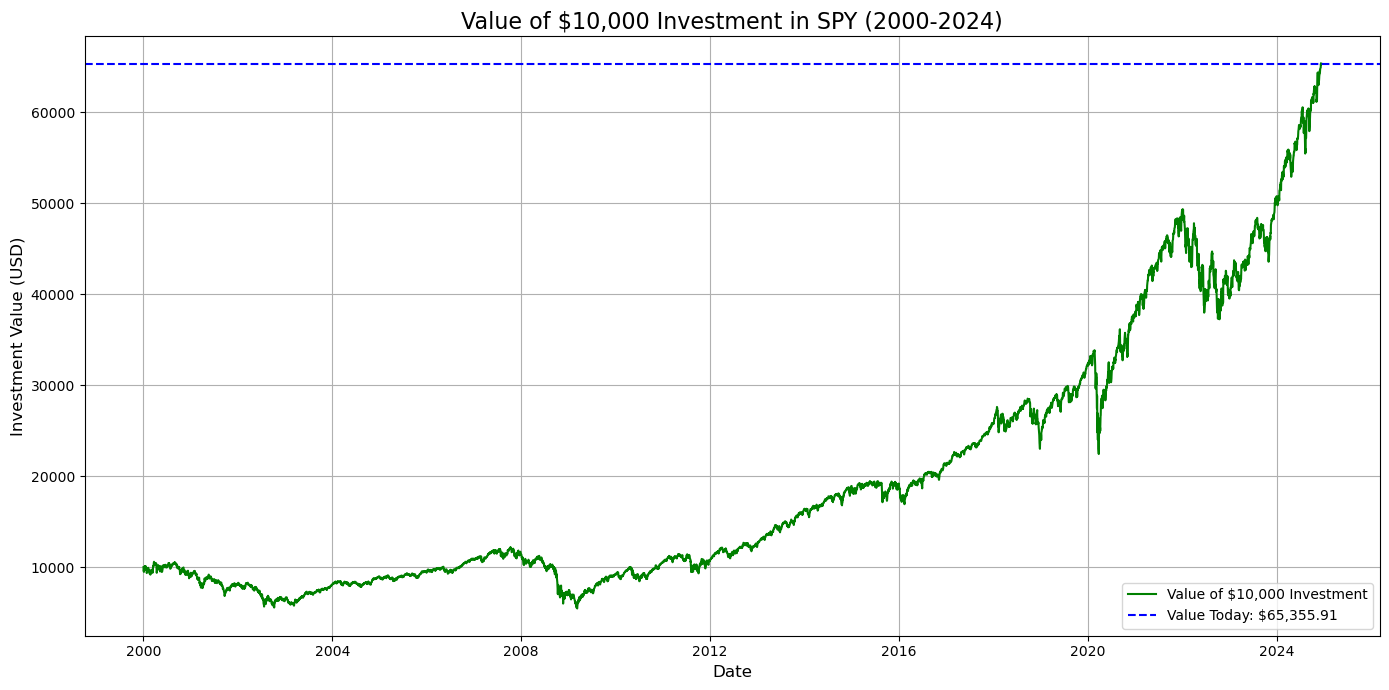

In [16]:
plt.figure(figsize=(14, 7))
plt.plot(spy['date'], invspy_10k, color='green', label='Value of $10,000 Investment')
plt.axhline(y=invspy_10k_today, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Value Today: ${invspy_10k_today:,.2f}')
plt.title('Value of $10,000 Investment in SPY (2000-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Investment Value (USD)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate the value of US$10,000 in a high interest savings account from 2000-2024

In [18]:
initial_investment = 10000  # $10,000
interest_rate = 0.015  # 1.5% annual interest rate
months = 24 * 12 + 12  

monthly_rate = interest_rate / 12
values = [initial_investment * (1 + monthly_rate)**i for i in range(months + 1)]

final_value = values[-1]

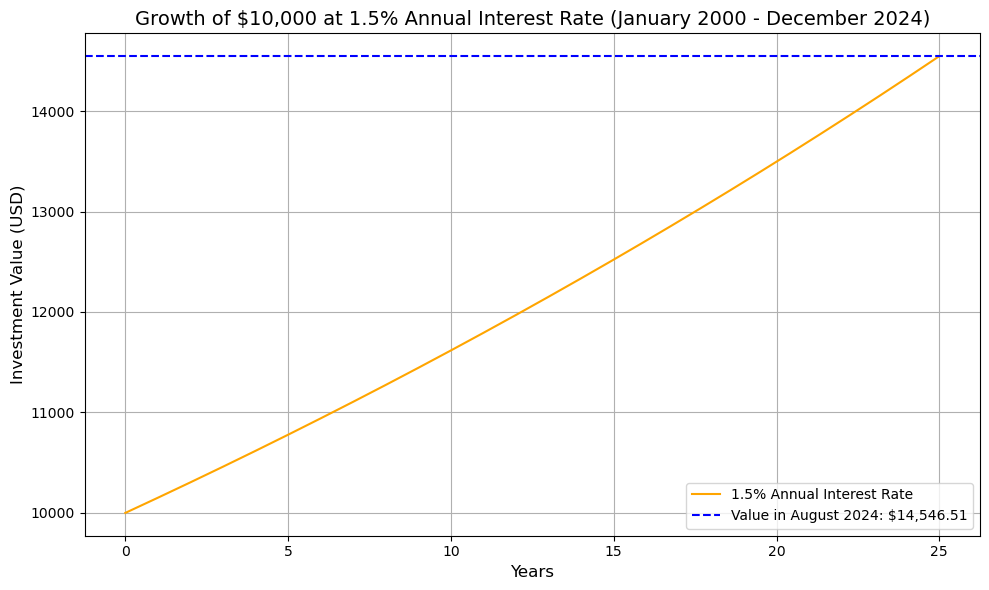

In [19]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(months + 1) / 12, values, color='orange', label='1.5% Annual Interest Rate')
plt.axhline(y=final_value, color='blue', linestyle='--', linewidth=1.5, label=f'Value in August 2024: ${final_value:,.2f}')

plt.title('Growth of $10,000 at 1.5% Annual Interest Rate (January 2000 - December 2024)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Investment Value (USD)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig('realcmp.png')

plt.show()

# Now given the returns from each medium, we visualise our returns from US$10,000

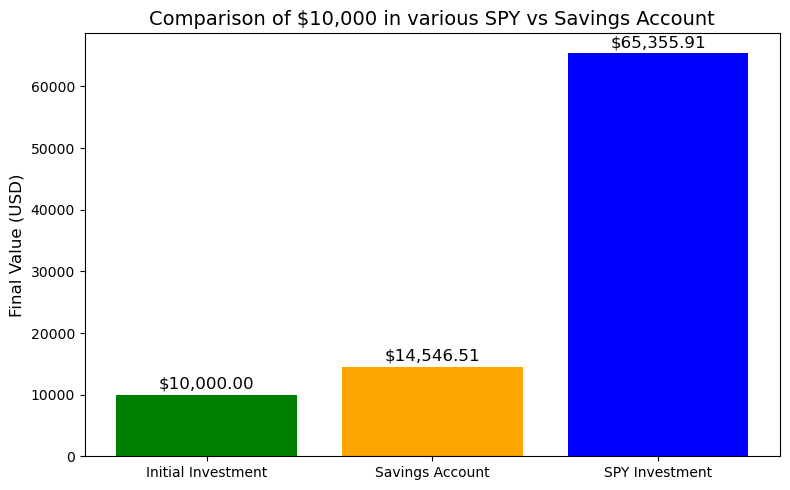

In [21]:
spy_10k_final_value = 65355.91
savings_10k_final_value = 14546.51 

categories = ['Initial Investment','Savings Account','SPY Investment']
values = [initial_investment, savings_10k_final_value, spy_10k_final_value]

plt.figure(figsize=(8, 5))
plt.bar(categories, values, color=['green', 'orange', 'blue'])

plt.title('Comparison of $10,000 in various SPY vs Savings Account', fontsize=14)
plt.ylabel('Final Value (USD)', fontsize=12)

for i, v in enumerate(values):
    plt.text(i, v + 1000, f'${v:,.2f}', ha='center', fontsize=12)

plt.tight_layout()
plt.savefig('comparison01.png')
plt.show()

# Returns from SPY in 24 years based on the defined schedule 

In [23]:
contribution_schedule = {
    '2000-01-01': 500,   # $500 monthly for 2 years (2000-2001)
    '2002-01-01': 1000,  # $1000 monthly for 2 years (2002-2003)
    '2004-01-01': 1500,  # $1500 monthly for 2 years (2004-2005)
    '2006-01-01': 2000   # $2000 monthly from 2006 onwards
}

invspy_dca = [initial_investment]
current_contribution = 500

for i in range(1, len(spy)):
    date = spy['date'].iloc[i]
    previous_value = invspy_dca[-1]
    growth_factor = spy['close_price'].iloc[i] / spy['close_price'].iloc[i - 1]
    new_value = previous_value * growth_factor
    if date.month != spy['date'].iloc[i - 1].month:
        new_value += current_contribution
    for start_date, contribution in contribution_schedule.items():
        if date >= pd.to_datetime(start_date):
            current_contribution = contribution
    invspy_dca.append(new_value)

invspy_dca_today = invspy_dca[-1]

print(f"Final Investment Value (Today): ${invspy_dca_today:,.2f}")

Final Investment Value (Today): $2,485,795.80


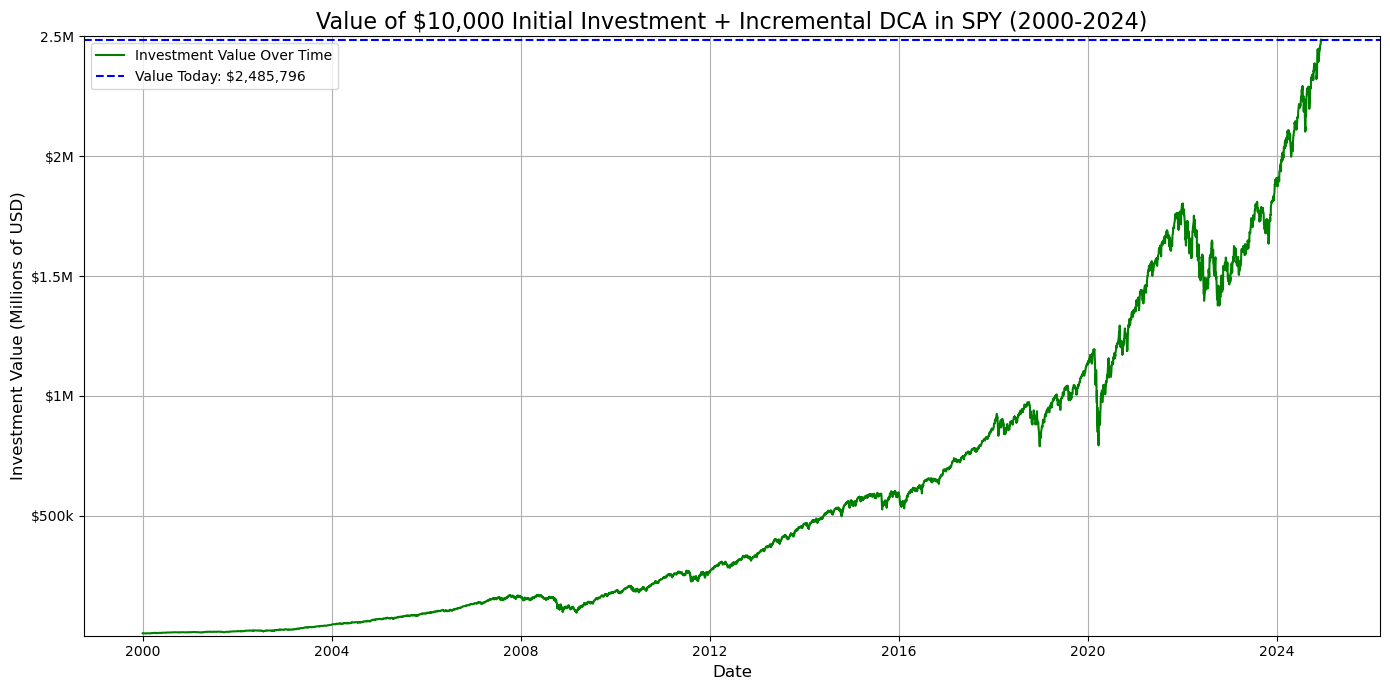

In [24]:
plt.figure(figsize=(14, 7))
plt.plot(spy['date'], invspy_dca, color='green', label='Investment Value Over Time')
plt.axhline(y=invspy_dca_today, color='blue', linestyle='--', linewidth=1.5, 
            label=f'Value Today: ${invspy_dca_today:,.0f}')

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'${x / 1e6:,.1f}M'))
plt.yticks([500000, 1000000, 1500000, 2000000, 2500000], ['$500k', '$1M', '$1.5M', '$2M', '2.5M'])
plt.ylim(0, 2500000)
plt.title('Value of $10,000 Initial Investment + Incremental DCA in SPY (2000-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Investment Value (Millions of USD)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Same contribution schedule for a savings account 

In [30]:
contribution_schedule_d = {pd.to_datetime(k): v for k, v in contribution_schedule.items()}

# Define constants
interest_rate = 0.015  # Annual interest rate
monthly_rate = interest_rate / 12  # Monthly interest rate
initial_investment = 10000  # Initial investment
start_date = min(contribution_schedule_d.keys())  # Start date from schedule
end_date = pd.to_datetime('2024-12-31')  # Define an end date dynamically if needed

# Initialize variables
total_value = initial_investment
values = [total_value]
dates = [start_date]

# Generate monthly dates between start and end date
current_date = start_date
while current_date <= end_date:
    # Determine the contribution for the current month
    current_contribution = max(
        (amount for date, amount in contribution_schedule_d.items() if current_date >= date),
        default=0
    )
    
    # Apply monthly interest
    total_value *= (1 + monthly_rate)
    
    # Add the current monthly contribution
    total_value += current_contribution
    
    # Store results
    values.append(total_value)
    dates.append(current_date)
    
    # Increment date by one month
    current_date += pd.DateOffset(months=1)

# Final value
final_value = values[-1]

# Output the results
print(f"Final value on {end_date.strftime('%Y-%m-%d')}: ${final_value:,.2f}")

Final value on 2024-12-31: $640,887.17


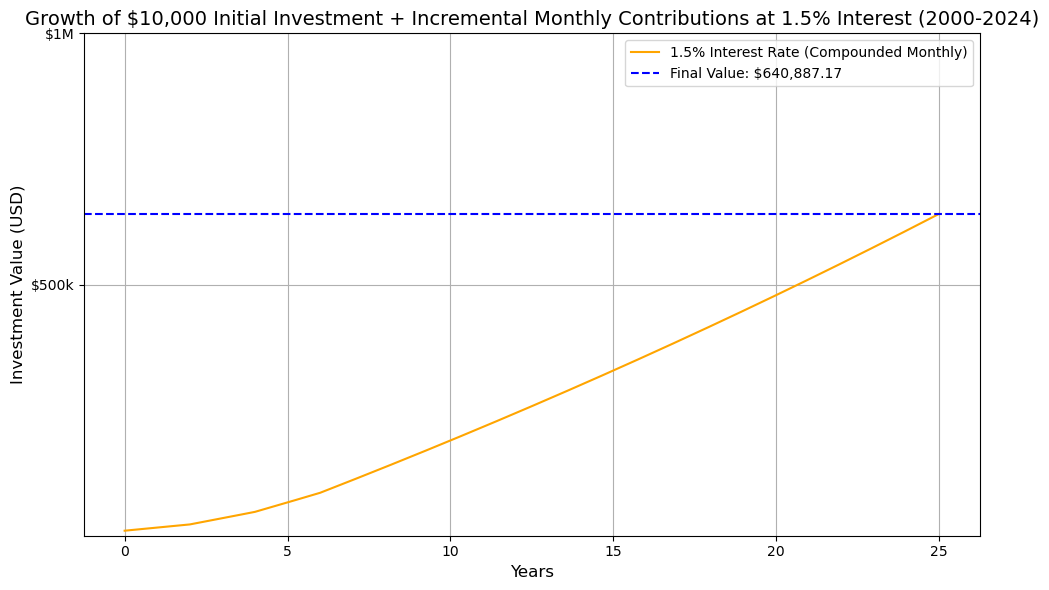

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(np.arange(months + 1) / 12, values, color='orange', label='1.5% Interest Rate (Compounded Monthly)')

# Add a horizontal line at the final value
plt.axhline(y=final_value, color='blue', linestyle='--', linewidth=1.5, label=f'Final Value: ${final_value:,.2f}')

# Set y-axis limit to $1 million
plt.ylim(0, 1000000)

# Set custom ticks for the y-axis at $500k and $1M
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}'.format(x / 1e6) + 'M'))
plt.yticks([500000, 1000000], ['$500k', '$1M'])

plt.title('Growth of $10,000 Initial Investment + Incremental Monthly Contributions at 1.5% Interest (2000-2024)', fontsize=14)
plt.xlabel('Years', fontsize=12)
plt.ylabel('Investment Value (USD)', fontsize=12)
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.savefig('incremental_savings_account_growth_adjusted_y_axis.png')  
plt.show()

# Minimum Contribution to reach 1 million USD 

In [51]:
# Define constants
monthly_contribution = 678  # Fixed monthly contribution
investment_values = [initial_investment]  # List to store portfolio values
total_value = initial_investment  # Initialize total portfolio value

# Iterate through SPY data
for i in range(1, len(spy)):
    # Calculate portfolio growth based on SPY price change
    total_value *= (spy['close_price'].iloc[i] / spy['close_price'].iloc[i - 1])
    
    # Add monthly contribution (once per month)
    if spy['date'].iloc[i].month != spy['date'].iloc[i - 1].month:
        total_value += monthly_contribution
    
    # Append the current total value to the list
    investment_values.append(total_value)

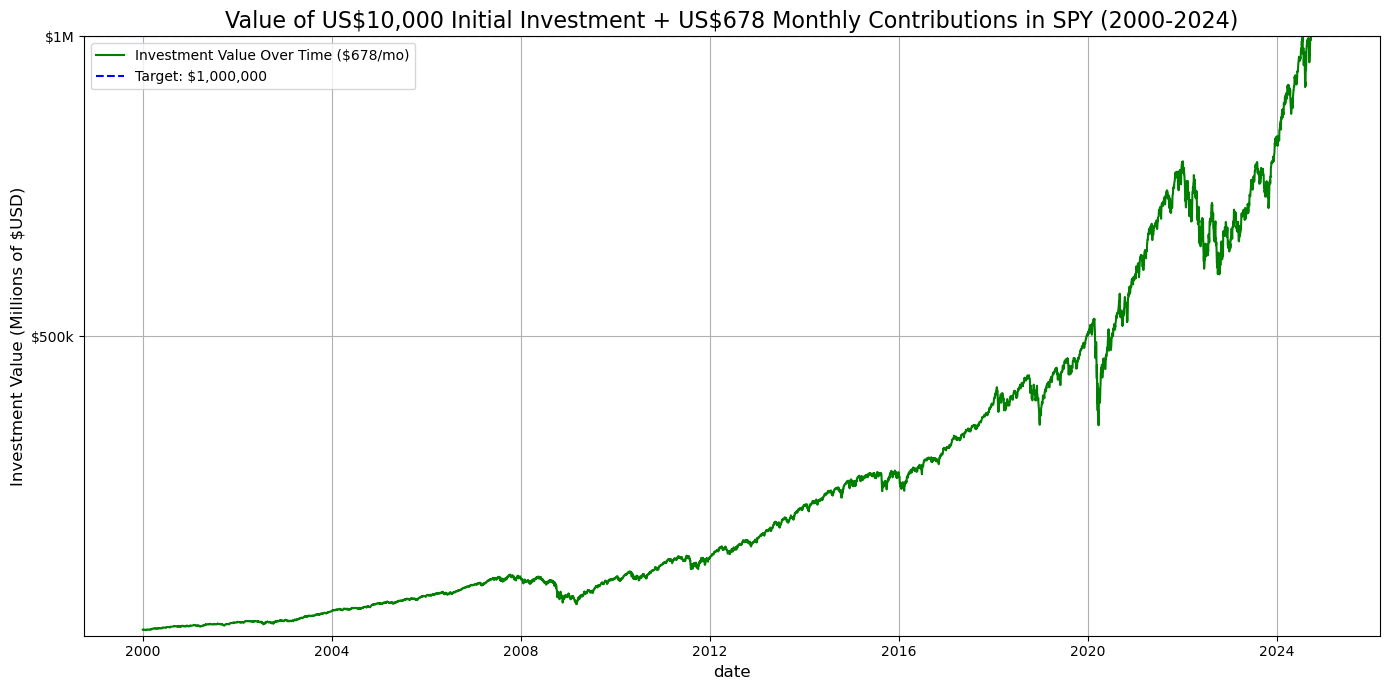

In [53]:
plt.figure(figsize=(14, 7))
plt.plot(spy['date'], investment_values, color='green', label=f'Investment Value Over Time (\\${monthly_contribution}/mo)')

plt.axhline(y=1000000, color='blue', linestyle='--', linewidth=1.5, label='Target: \\$1,000,000')
plt.ylim(0, 1000000)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '\\${:,.0f}'.format(x / 1e6) + 'M'))
plt.yticks([500000, 1000000], ['\\$500k', '\\$1M'])

plt.title(f'Value of US\\$10,000 Initial Investment + US\\${monthly_contribution} Monthly Contributions in SPY (2000-2024)', fontsize=16)
plt.xlabel('date', fontsize=12)
plt.ylabel('Investment Value (Millions of \\$USD)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('678permonth.png')
plt.show()

In [62]:
monthly_contribution = 500  # USD

spy['Investment Value'] = 0.0
spy.loc[spy.index[0], 'Investment Value'] = initial_investment

for i in range(1, len(spy)):
    # Calculate the previous investment value
    previous_value = spy.loc[spy.index[i - 1], 'Investment Value']
    
    # Calculate the growth due to SPY price change
    growth_factor = spy['close_price'].iloc[i] / spy['close_price'].iloc[i - 1]
    spy.loc[spy.index[i], 'Investment Value'] = previous_value * growth_factor
    
    # Add the monthly contribution (only at the start of a new month)
    if spy['date'].iloc[i].month != spy['date'].iloc[i - 1].month:
        spy.loc[spy.index[i], 'Investment Value'] += monthly_contribution

current_value = spy['Investment Value'].iloc[-1]

print(f"Current portfolio value: ${current_value:,.2f}")

Current portfolio value: $814,712.38


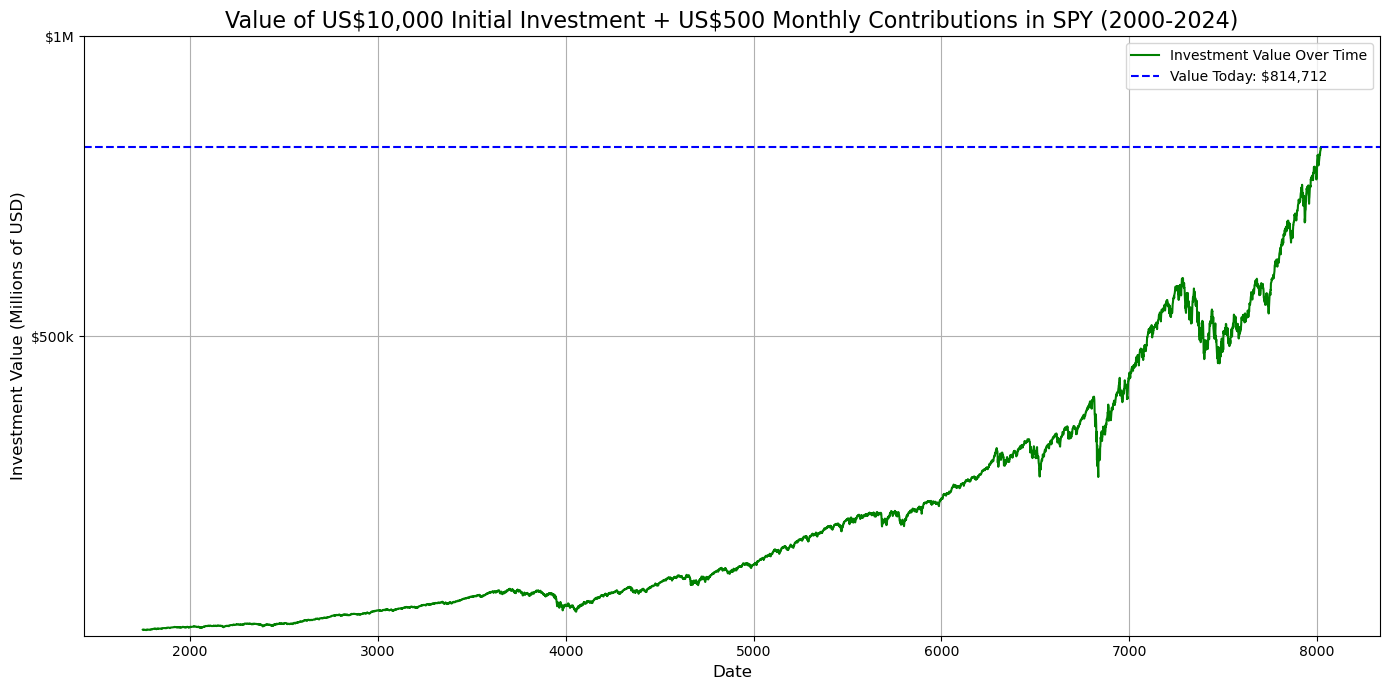

In [64]:
plt.figure(figsize=(14, 7))
plt.plot(spy.index, spy['Investment Value'], color='green', label='Investment Value Over Time')

# Add a horizontal line at the current investment value
plt.axhline(y=current_value, color='blue', linestyle='--', linewidth=1.5, label=f'Value Today: ${current_value:,.0f}')

# Set custom ticks for the y-axis at $500k, $1M, $1.5M, $2M
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '${:,.0f}'.format(x / 1e6) + 'M'))
plt.yticks([500000, 1000000, 1500000, 2000000], ['$500k', '$1M', '$1.5M', '$2M'])

plt.ylim(0, 1000000)

"""
Set labels and title and show plot
"""
plt.title('Value of US\$10,000 Initial Investment + US\$500 Monthly Contributions in SPY (2000-2024)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Investment Value (Millions of USD)', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('500permonth.png')
plt.show()

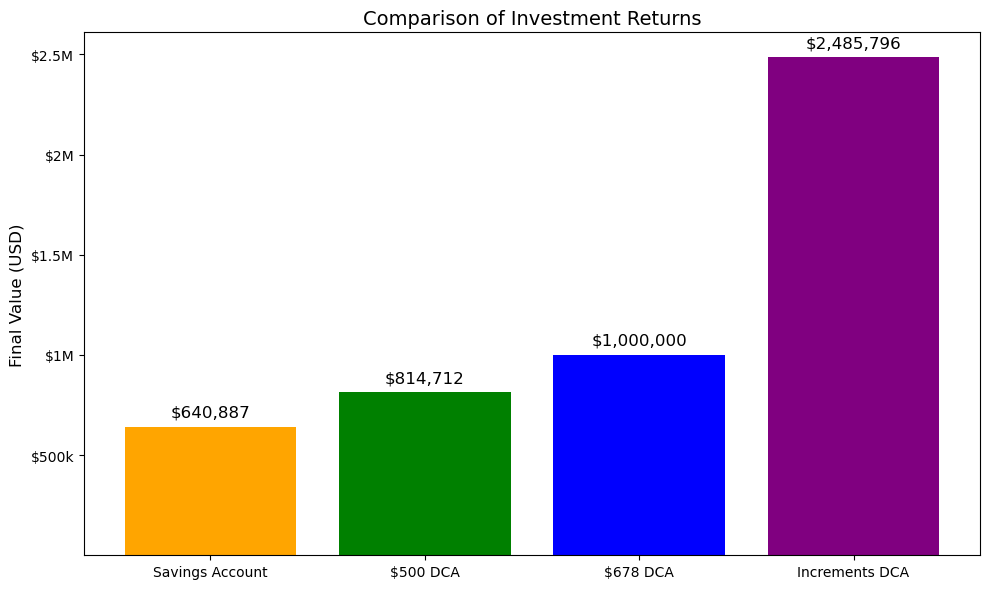

In [69]:
categories = ['Savings Account', '$500 DCA', '$678 DCA', 'Increments DCA']
values = [640887.17, 814712, 1000000, 2485795.80]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=['orange', 'green', 'blue', 'purple'])

plt.title('Comparison of Investment Returns', fontsize=14)
plt.ylabel('Final Value (USD)', fontsize=12)

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '\\${:,.0f}'.format(x / 1e6) + 'M'))
plt.yticks([500000, 1000000, 1500000, 2000000, 2500000], ['\\$500k', '\\$1M', '\\$1.5M', '\\$2M', '\\$2.5M'])

for i, v in enumerate(values):
    plt.text(i, v + 50000, f'\\${v:,.0f}', ha='center', fontsize=12)

plt.tight_layout()